## Mostrar datos de núcleos y derivar poro / perm

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [19]:
core_data = pd.read_csv('Datos/15_9-19A-CORE.csv')

In [20]:
core_data.head()

,DEPTH,OrigDepth,CORE_NO,SAMPLE,CKHG,CKHL,CKVG,CKVL,CPOR,CPORV,So,Sw,CGD,CGDV
0,3838.60,3837.00,1,1,13.80,11.500,NaN,NaN,17.0,NaN,NaN,NaN,2.66,NaN
1,3838.85,3837.25,1,2,NaN,NaN,NaN,NaN,14.8,NaN,NaN,NaN,2.67,NaN
2,3839.15,3837.55,1,3,25.20,21.400,3.94,3.16,10.8,NaN,NaN,NaN,2.69,NaN
3,3839.40,3837.80,1,4,1.02,0.694,NaN,NaN,12.8,NaN,NaN,NaN,2.70,NaN
4,3839.48,3837.88,1,5,NaN,NaN,NaN,NaN,NaN,18.8,52.9,36.4,NaN,2.68


In [21]:
core_data.describe()

,DEPTH,OrigDepth,CORE_NO,SAMPLE,CKHG,CKHL,CKVG,CKVL,CPOR,CPORV,So,Sw,CGD,CGDV
count,728.000000,728.000000,728.00000,728.000000,557.000000,557.000000,141.000000,141.000000,593.000000,71.000000,71.000000,71.000000,594.000000,71.000000
mean,3920.528338,3920.153338,3.93956,364.500000,649.801463,627.972549,490.086071,472.875284,16.829342,19.497183,56.943662,28.309859,2.653569,2.656901
std,46.545695,46.902816,1.75976,210.299786,2160.127387,2116.307023,1973.601098,1929.420018,6.552523,5.657763,21.084319,19.203758,0.046735,0.035560
min,3838.600000,3837.000000,1.00000,1.000000,0.018000,0.010000,0.030000,0.017000,2.900000,2.700000,0.000000,4.500000,2.250000,2.620000
25%,3882.580000,3881.980000,3.00000,182.750000,2.620000,2.030000,0.874000,0.590000,12.000000,18.150000,52.000000,18.200000,2.640000,2.630000
50%,3921.725000,3921.125000,4.00000,364.500000,59.900000,52.300000,27.300000,23.300000,18.100000,21.200000,62.300000,22.800000,2.650000,2.650000
75%,3960.287500,3960.487500,5.00000,546.250000,213.000000,194.000000,108.000000,96.300000,21.700000,23.500000,68.500000,29.950000,2.660000,2.660000
max,3999.950000,3999.750000,7.00000,728.000000,20800.000000,20500.000000,14800.000000,14500.000000,36.000000,27.800000,86.000000,90.800000,3.030000,2.810000


<Axes: xlabel='CPOR', ylabel='CKHG'>

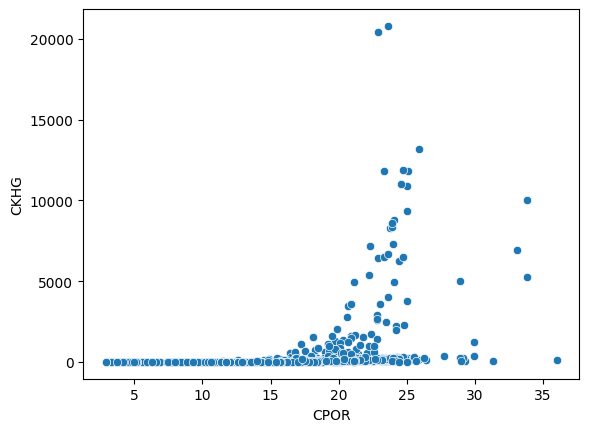

In [22]:
sns.scatterplot(x='CPOR', y='CKHG', data=core_data)

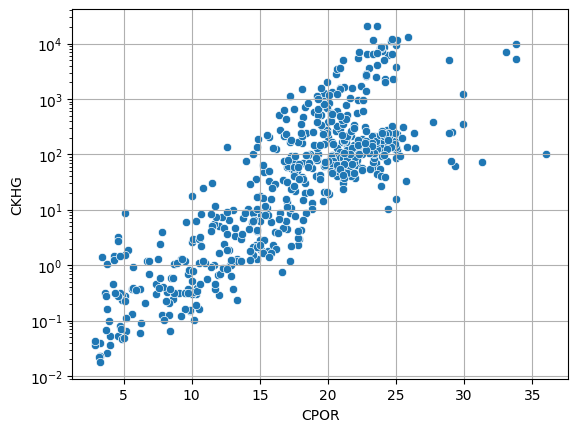

In [23]:
sns.scatterplot(x='CPOR', y='CKHG', data=core_data)
plt.yscale('log')
plt.grid(True)

In [24]:
import statsmodels.api as sm

x = core_data['CPOR']
y = np.log10(core_data['CKHG'])

model = sm.OLS(y, x, missing='drop')
results = model.fit()  # Esto es lo que realiza la regresión lineal

In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   CKHG   R-squared (uncentered):                   0.793
Model:                            OLS   Adj. R-squared (uncentered):              0.793
Method:                 Least Squares   F-statistic:                              2129.
Date:                Thu, 22 Feb 2024   Prob (F-statistic):                   2.80e-192
Time:                        22:01:09   Log-Likelihood:                         -726.48
No. Observations:                 557   AIC:                                      1455.
Df Residuals:                     556   BIC:                                      1459.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CPOR           0.0949      0.002     46.145      0.000       0.091       0.099
==============================================================================
Omnibus:                        9.398   Durbin-Watson:                   0.654
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                7.595
Skew:                           0.198   Prob(JB):                       0.0224
Kurtosis:                       2.588   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
x = np.polyfit(core_data['CPOR'], np.log10(core_data['CKHG']))

TypeError: polyfit() missing 1 required positional argument: 'deg'

In [27]:
from sklearn.linear_model import LinearRegression

X = core_data['CPOR'].values.reshape(-1, 1)
y = np.log10(core_data['CKHG'])

model = LinearRegression()
model.fit(X, y)

slope = model.coef_
intercept = model.intercept_

print("Pendiente: ", slope)
print("Intercepto: ", intercept)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

<Axes: >

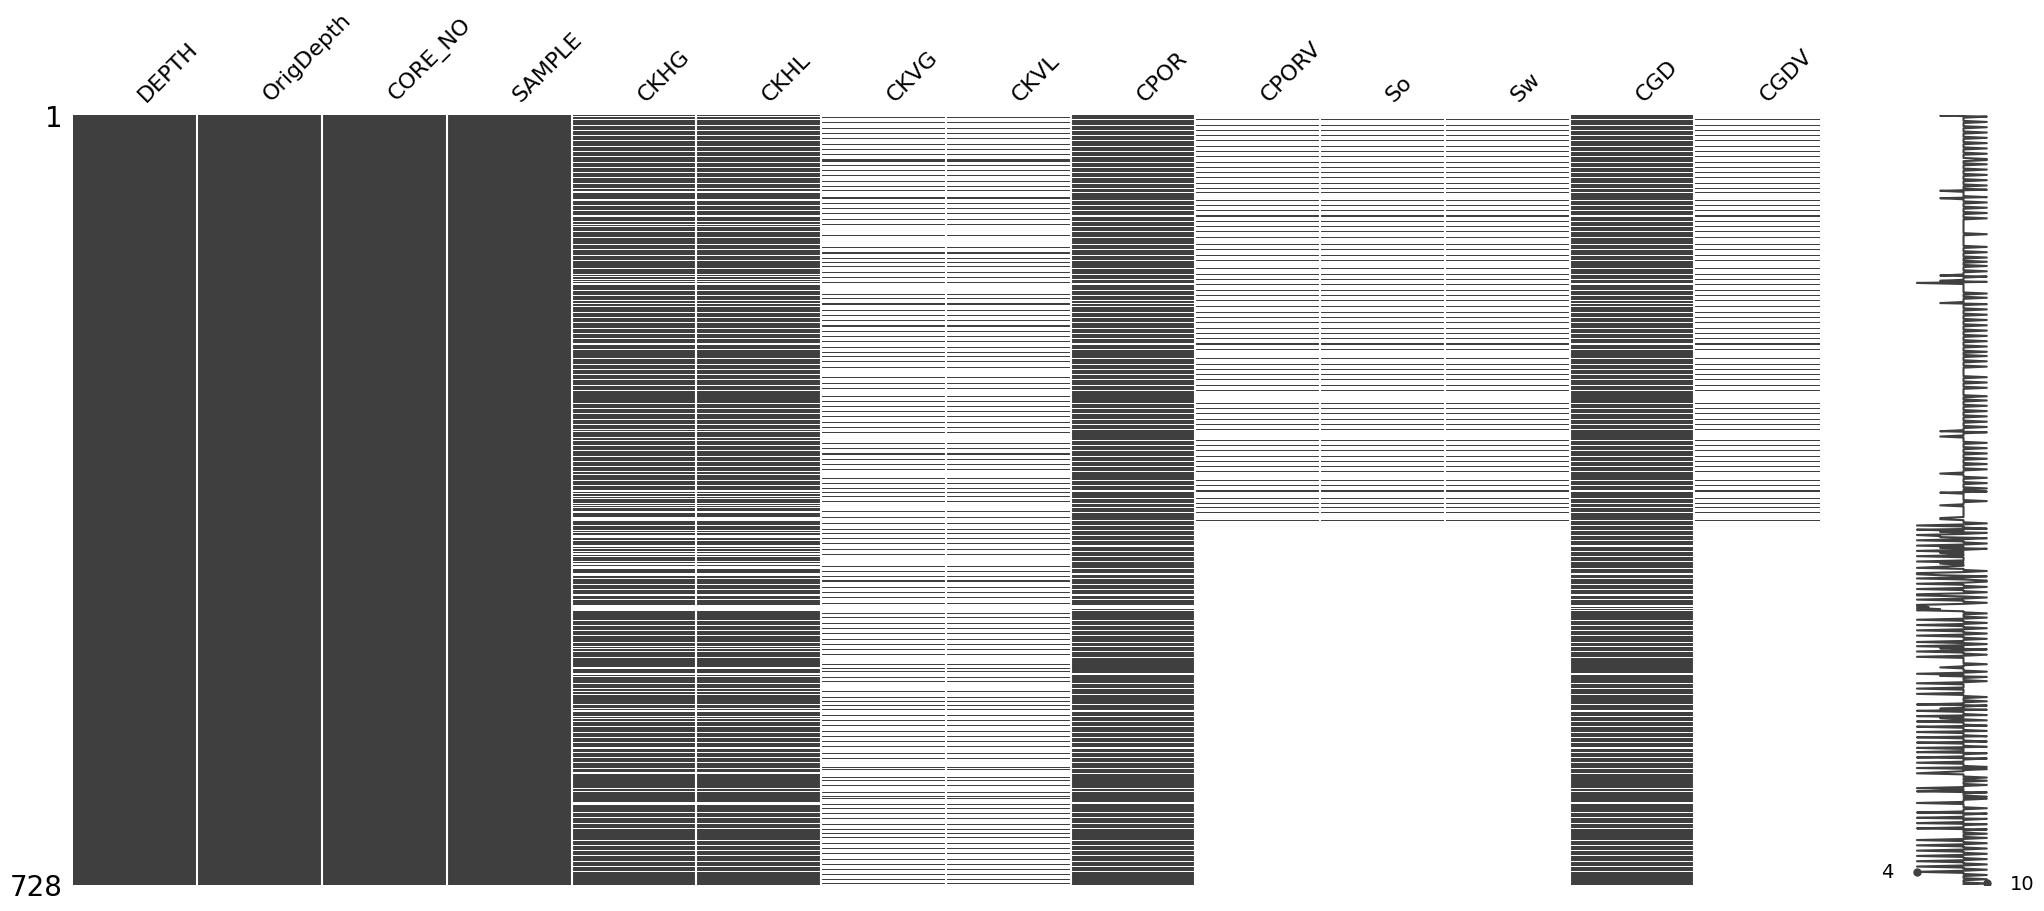

In [28]:
import missingno as msno

msno.matrix(core_data)

In [29]:
core_data.head()

,DEPTH,OrigDepth,CORE_NO,SAMPLE,CKHG,CKHL,CKVG,CKVL,CPOR,CPORV,So,Sw,CGD,CGDV
0,3838.60,3837.00,1,1,13.80,11.500,NaN,NaN,17.0,NaN,NaN,NaN,2.66,NaN
1,3838.85,3837.25,1,2,NaN,NaN,NaN,NaN,14.8,NaN,NaN,NaN,2.67,NaN
2,3839.15,3837.55,1,3,25.20,21.400,3.94,3.16,10.8,NaN,NaN,NaN,2.69,NaN
3,3839.40,3837.80,1,4,1.02,0.694,NaN,NaN,12.8,NaN,NaN,NaN,2.70,NaN
4,3839.48,3837.88,1,5,NaN,NaN,NaN,NaN,NaN,18.8,52.9,36.4,NaN,2.68


In [30]:
CPOR_CKHG_only = core_data[['CPOR', 'CKHG']].dropna()

In [31]:
CPOR_CKHG_only

,CPOR,CKHG
0,17.0,13.80
2,10.8,25.20
3,12.8,1.02
5,16.4,524.00
6,16.5,274.00
...,...,...
723,28.9,4980.00
724,20.7,3460.00
725,20.9,3600.00
726,17.3,180.00


In [32]:
x = np.polyfit(CPOR_CKHG_only['CPOR'], np.log10(CPOR_CKHG_only['CKHG']), 1)

In [33]:
x

array([ 0.17428705, -1.55607816])

In [34]:
X = CPOR_CKHG_only['CPOR'].values.reshape(-1, 1)
y = np.log10(CPOR_CKHG_only['CKHG'])

model = LinearRegression()
model.fit(X, y)

slope = model.coef_
intercept = model.intercept_

print("Pendiente: ", slope)
print("Intercepto: ", intercept)

Pendiente:  [0.17428705]
Intercepto:  -1.5560781598525855


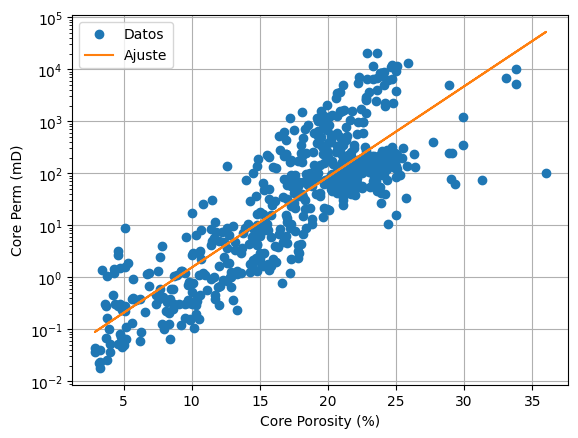

In [35]:
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots()

ax.semilogy(CPOR_CKHG_only['CPOR'], CPOR_CKHG_only['CKHG'], 'o', label='Datos')

ax.grid(True)
ax.set_ylabel('Core Perm (mD)')
ax.set_xlabel('Core Porosity (%)')

ax.semilogy(CPOR_CKHG_only['CPOR'], 10**(x[0] * CPOR_CKHG_only['CPOR'] + x[1]), label='Ajuste')

plt.legend()
plt.show()

In [37]:
core_data["Predicted CKHG"] = 10**(x[0] * core_data['CPOR'] + x[1])

In [38]:
core_data.head()

,DEPTH,OrigDepth,CORE_NO,SAMPLE,CKHG,CKHL,CKVG,CKVL,CPOR,CPORV,So,Sw,CGD,CGDV,Predicted CKHG
0,3838.60,3837.00,1,1,13.80,11.500,NaN,NaN,17.0,NaN,NaN,NaN,2.66,NaN,25.515357
1,3838.85,3837.25,1,2,NaN,NaN,NaN,NaN,14.8,NaN,NaN,NaN,2.67,NaN,10.552859
2,3839.15,3837.55,1,3,25.20,21.400,3.94,3.16,10.8,NaN,NaN,NaN,2.69,NaN,2.119444
3,3839.40,3837.80,1,4,1.02,0.694,NaN,NaN,12.8,NaN,NaN,NaN,2.70,NaN,4.729291
4,3839.48,3837.88,1,5,NaN,NaN,NaN,NaN,NaN,18.8,52.9,36.4,NaN,2.68,NaN


In [39]:
core_data.describe()

,DEPTH,OrigDepth,CORE_NO,SAMPLE,CKHG,CKHL,CKVG,CKVL,CPOR,CPORV,So,Sw,CGD,CGDV,Predicted CKHG
count,728.000000,728.000000,728.00000,728.000000,557.000000,557.000000,141.000000,141.000000,593.000000,71.000000,71.000000,71.000000,594.000000,71.000000,593.000000
mean,3920.528338,3920.153338,3.93956,364.500000,649.801463,627.972549,490.086071,472.875284,16.829342,19.497183,56.943662,28.309859,2.653569,2.656901,365.256296
std,46.545695,46.902816,1.75976,210.299786,2160.127387,2116.307023,1973.601098,1929.420018,6.552523,5.657763,21.084319,19.203758,0.046735,0.035560,2612.359270
min,3838.600000,3837.000000,1.00000,1.000000,0.018000,0.010000,0.030000,0.017000,2.900000,2.700000,0.000000,4.500000,2.250000,2.620000,0.088993
25%,3882.580000,3881.980000,3.00000,182.750000,2.620000,2.030000,0.874000,0.590000,12.000000,18.150000,52.000000,18.200000,2.640000,2.630000,3.430571
50%,3921.725000,3921.125000,4.00000,364.500000,59.900000,52.300000,27.300000,23.300000,18.100000,21.200000,62.300000,22.800000,2.650000,2.650000,39.675042
75%,3960.287500,3960.487500,5.00000,546.250000,213.000000,194.000000,108.000000,96.300000,21.700000,23.500000,68.500000,29.950000,2.660000,2.660000,168.248332
max,3999.950000,3999.750000,7.00000,728.000000,20800.000000,20500.000000,14800.000000,14500.000000,36.000000,27.800000,86.000000,90.800000,3.030000,2.810000,52270.366485
